# IML Assignment 1

## Name: Vladimir Ryabenko
## mail: v.ryabenko@innopolis.university

## Task 1

### Linear Regression
#### Data reading & plotting

In [174]:
import pandas as pd

df = pd.read_csv('task1_data.csv')
df.head()


,X_train,y_train,X_test,y_test
0,0.136018,-0.129555,0.000000,0.000000
1,0.207231,0.894330,0.172414,0.270000
2,0.246135,-0.791176,0.344828,0.535057
3,0.298175,0.180217,0.517241,0.790317
4,0.635941,3.722585,0.689655,1.031108


In [138]:
X_train, y_train = df['X_train'].to_numpy().reshape(-1, 1), df['y_train'].to_numpy().reshape(-1, 1)
X_test, y_test = df['X_test'].to_numpy().reshape(-1, 1), df['y_test'].to_numpy().reshape(-1, 1)


<Figure size 1400x500 with 0 Axes>

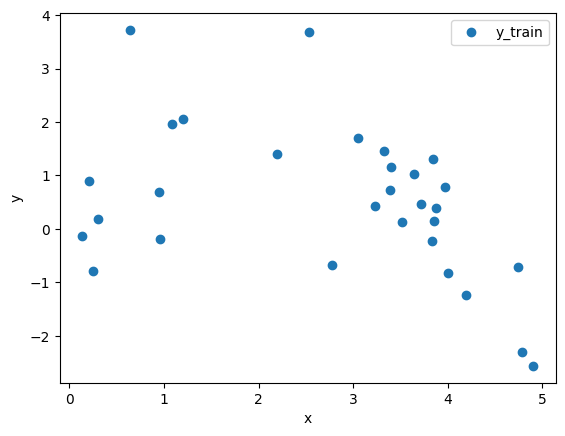

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
df.plot(x='X_train', y='y_train', style='o')

plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()


#### Linear regression model fitting

In [140]:
from sklearn.linear_model import LinearRegression
import numpy as np

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

#### Linear regression model prediction & Evaluation


In [141]:
from sklearn import metrics


def print_metrics(y_actual, y_pred):
    print("MSE", metrics.mean_squared_error(y_actual, y_pred))
    print("MAE", metrics.mean_absolute_error(y_actual, y_pred))
    print("RMSE", np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))
    print("R^2", metrics.r2_score(y_actual, y_pred))


In [142]:
y_pred_lr = regressor.predict(X_test)

print_metrics(y_test, y_pred_lr)


MSE 0.78105677092199
MAE 0.7837610302414408
RMSE 0.8837741628504365
R^2 0.2609450135378707


#### Plotting original data and prediction


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


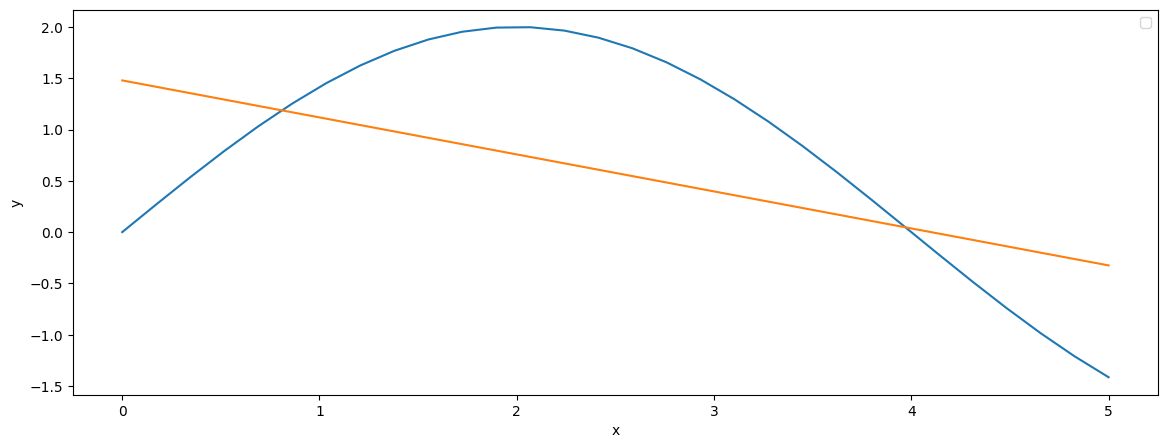

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(X_test, y_test)
plt.plot(X_test, y_pred_lr)

plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()


#### Did the linear regression model give a good fit? Elaborate your answer

The fit is not good as r2-score is too small and MSE, MAE and RMSE are to large.

### Polynomial Regression
#### Constructing the polynomial regression pipeline

In [144]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [145]:
polynomial_features = PolynomialFeatures()
linear_regression = LinearRegression()
pipeline = Pipeline([('polynomial_features', polynomial_features),
                     ('linear_regression', linear_regression)])


#### Tuning the degree hyper-parameter using GridSearch

In [146]:
from sklearn.model_selection import GridSearchCV

degrees = range(2, 10)
parameters = {'polynomial_features__degree': degrees}

search = GridSearchCV(estimator=pipeline,
                      param_grid=parameters,
                      scoring='neg_mean_squared_error',
                      cv=8)

search.fit(X_train, y_train)

best_score = search.best_score_
best_param = search.best_params_['polynomial_features__degree']

print("Best parameter (CV score=%0.3f):" % (best_score), best_param)


Best parameter (CV score=-1.078): 2


In [147]:
y_pred_pr = search.predict(X_test)
print_metrics(y_test, y_pred_pr)

MSE 0.08205877217937999
MAE 0.15213273421671694
RMSE 0.2864590235607529
R^2 0.9223539862658872


#### Manually finding the best degree

In [148]:
scores = []

for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    linear_regressor = LinearRegression()

    X_train_polynomial = polynomial_features.fit_transform(X_train)
    linear_regressor.fit(X_train_polynomial, y_train)

    current_scores = cross_val_score(linear_regressor, X_train_polynomial,
                                     y_train, scoring='neg_mean_squared_error', cv=8)

    scores.append(current_scores.mean())

best_score = max(scores)
best_param = scores.index(max(scores)) + degrees[0]

print("Best parameter (CV score=%0.3f):" % (best_score), best_param)


Best parameter (CV score=-1.078): 2


#### Plotting the test data and the best degree polynomial model

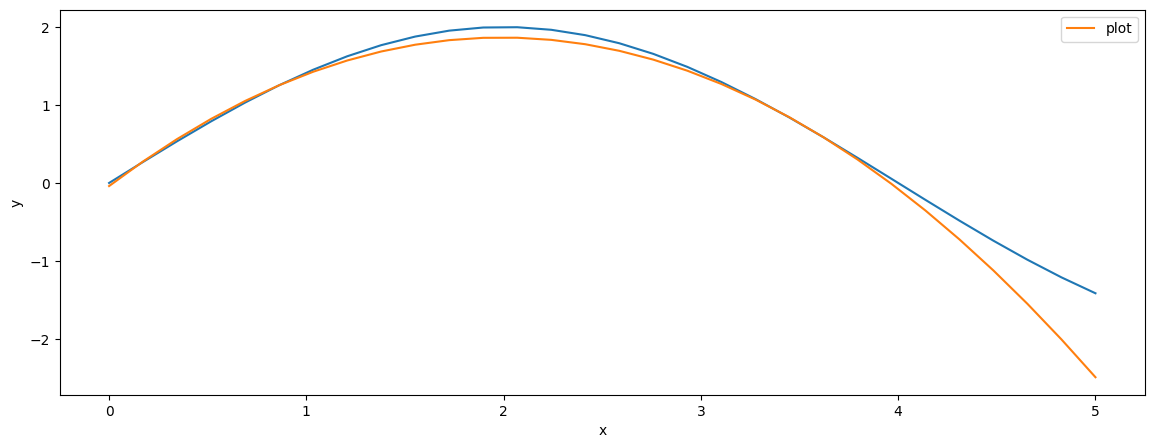

In [149]:
plt.figure(figsize=(14, 5))
plt.plot(X_test, y_test)
plt.plot(X_test, y_pred_pr, label="plot")

plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()


## Task 2

### Data processing
#### Loading the dataset

In [150]:
import pandas as pd

df = pd.read_csv('pokemon_modified.csv')

pd.set_option('display.max_columns', None)
df.head()


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defense,experience_growth,height_m,hp,name,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Bulbasaur,88.1,grass,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Ivysaur,88.1,grass,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Venusaur,88.1,grass,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Charmander,88.1,fire,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Charmeleon,88.1,fire,80,65,80,19.0,1,0


#### Remove the 2 redundant features

In [151]:
df = df.drop(['classification', 'name'], axis=1)

X = df.drop('is_legendary', axis=1)
y = df['is_legendary']


'classification' and 'name' are redundant features as they do not give any useful information, on which the legendarity may be dependent.

#### Splitting the data
random_state = 123, use stratify, test_size = 0.2

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=123, stratify=y, test_size=0.2)


Check if the dataset is balanced or not and comment on it

In [153]:
print(y.mean(), y_train.mean(), y_test.mean())

0.08739076154806492 0.0875 0.08695652173913043


#### Exploring the dataset and checking for missing values

In [154]:
df.head()


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,49,1059860,0.7,45,88.1,grass,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,63,1059860,1.0,60,88.1,grass,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,123,1059860,2.0,80,88.1,grass,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,43,1059860,0.6,39,88.1,fire,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,58,1059860,1.1,58,88.1,fire,80,65,80,19.0,1,0


In [155]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

#### Impute the missing values

In [156]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)



#### Double check that there are no missing values

In [157]:
print(X_train.isnull().any().any())
print(X_test.isnull().any().any())


False
False


#### Encode categorically

In [158]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    new_cols = pd.DataFrame(
        new_feats, columns=encoder.get_feature_names_out(features_name))
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df


In [159]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

feature_names = ['type1']
encoder.fit(X_train[feature_names])

X_train = ohe_new_features(X_train, feature_names, encoder)
X_test = ohe_new_features(X_test, feature_names, encoder)


#### Scale the data

In [160]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.2,0.200000,0.5,0.500,0.200000,0.500,0.000000,0.066667,0.25,1.000000,0.50,0.066667,0.5,0.125,0.250,0.200000,0.200000,0.200000,0.588571,0.217391,0.500000,0.525000,0.166667,0.568889,0.384615,0.076389,0.287402,0.881,0.396739,0.214286,0.154286,0.080916,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2,0.466667,0.5,0.250,0.066667,0.125,0.066667,0.200000,0.50,0.066667,0.50,0.066667,1.0,0.250,0.125,0.466667,0.066667,0.466667,0.542857,1.000000,0.714286,0.700000,0.000000,0.422222,0.625000,0.020833,0.389764,0.500,0.489130,0.380952,0.542857,0.003901,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,0.25,0.466667,1.0,0.250,0.500,0.200000,0.200000,0.066667,0.571429,0.130435,0.500000,0.516667,0.166667,0.266667,0.442173,0.111111,0.311024,0.500,0.489130,0.238095,0.371429,0.015403,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.200000,0.5,0.250,0.200000,0.500,0.200000,0.200000,0.00,0.200000,0.25,0.200000,1.0,0.250,0.250,0.200000,0.200000,0.200000,0.428571,0.130435,0.500000,0.516667,0.166667,0.444444,0.625000,0.076389,0.370079,0.000,0.163043,0.238095,0.542857,0.075415,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.200000,0.5,0.000,0.200000,0.250,0.200000,0.200000,0.25,0.466667,0.25,0.466667,1.0,0.125,0.250,0.066667,0.200000,0.466667,0.685714,0.130435,0.500000,0.533333,0.226190,0.422222,0.384615,0.166667,0.389764,0.500,0.244565,0.309524,0.171429,0.920084,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Correlation Matrix

Are there highly co-related features in the dataset? Is it a problem?

In the dataset there are several midium co-related and only one higly co-related features. Thus, it is not a problem.

<Axes: >

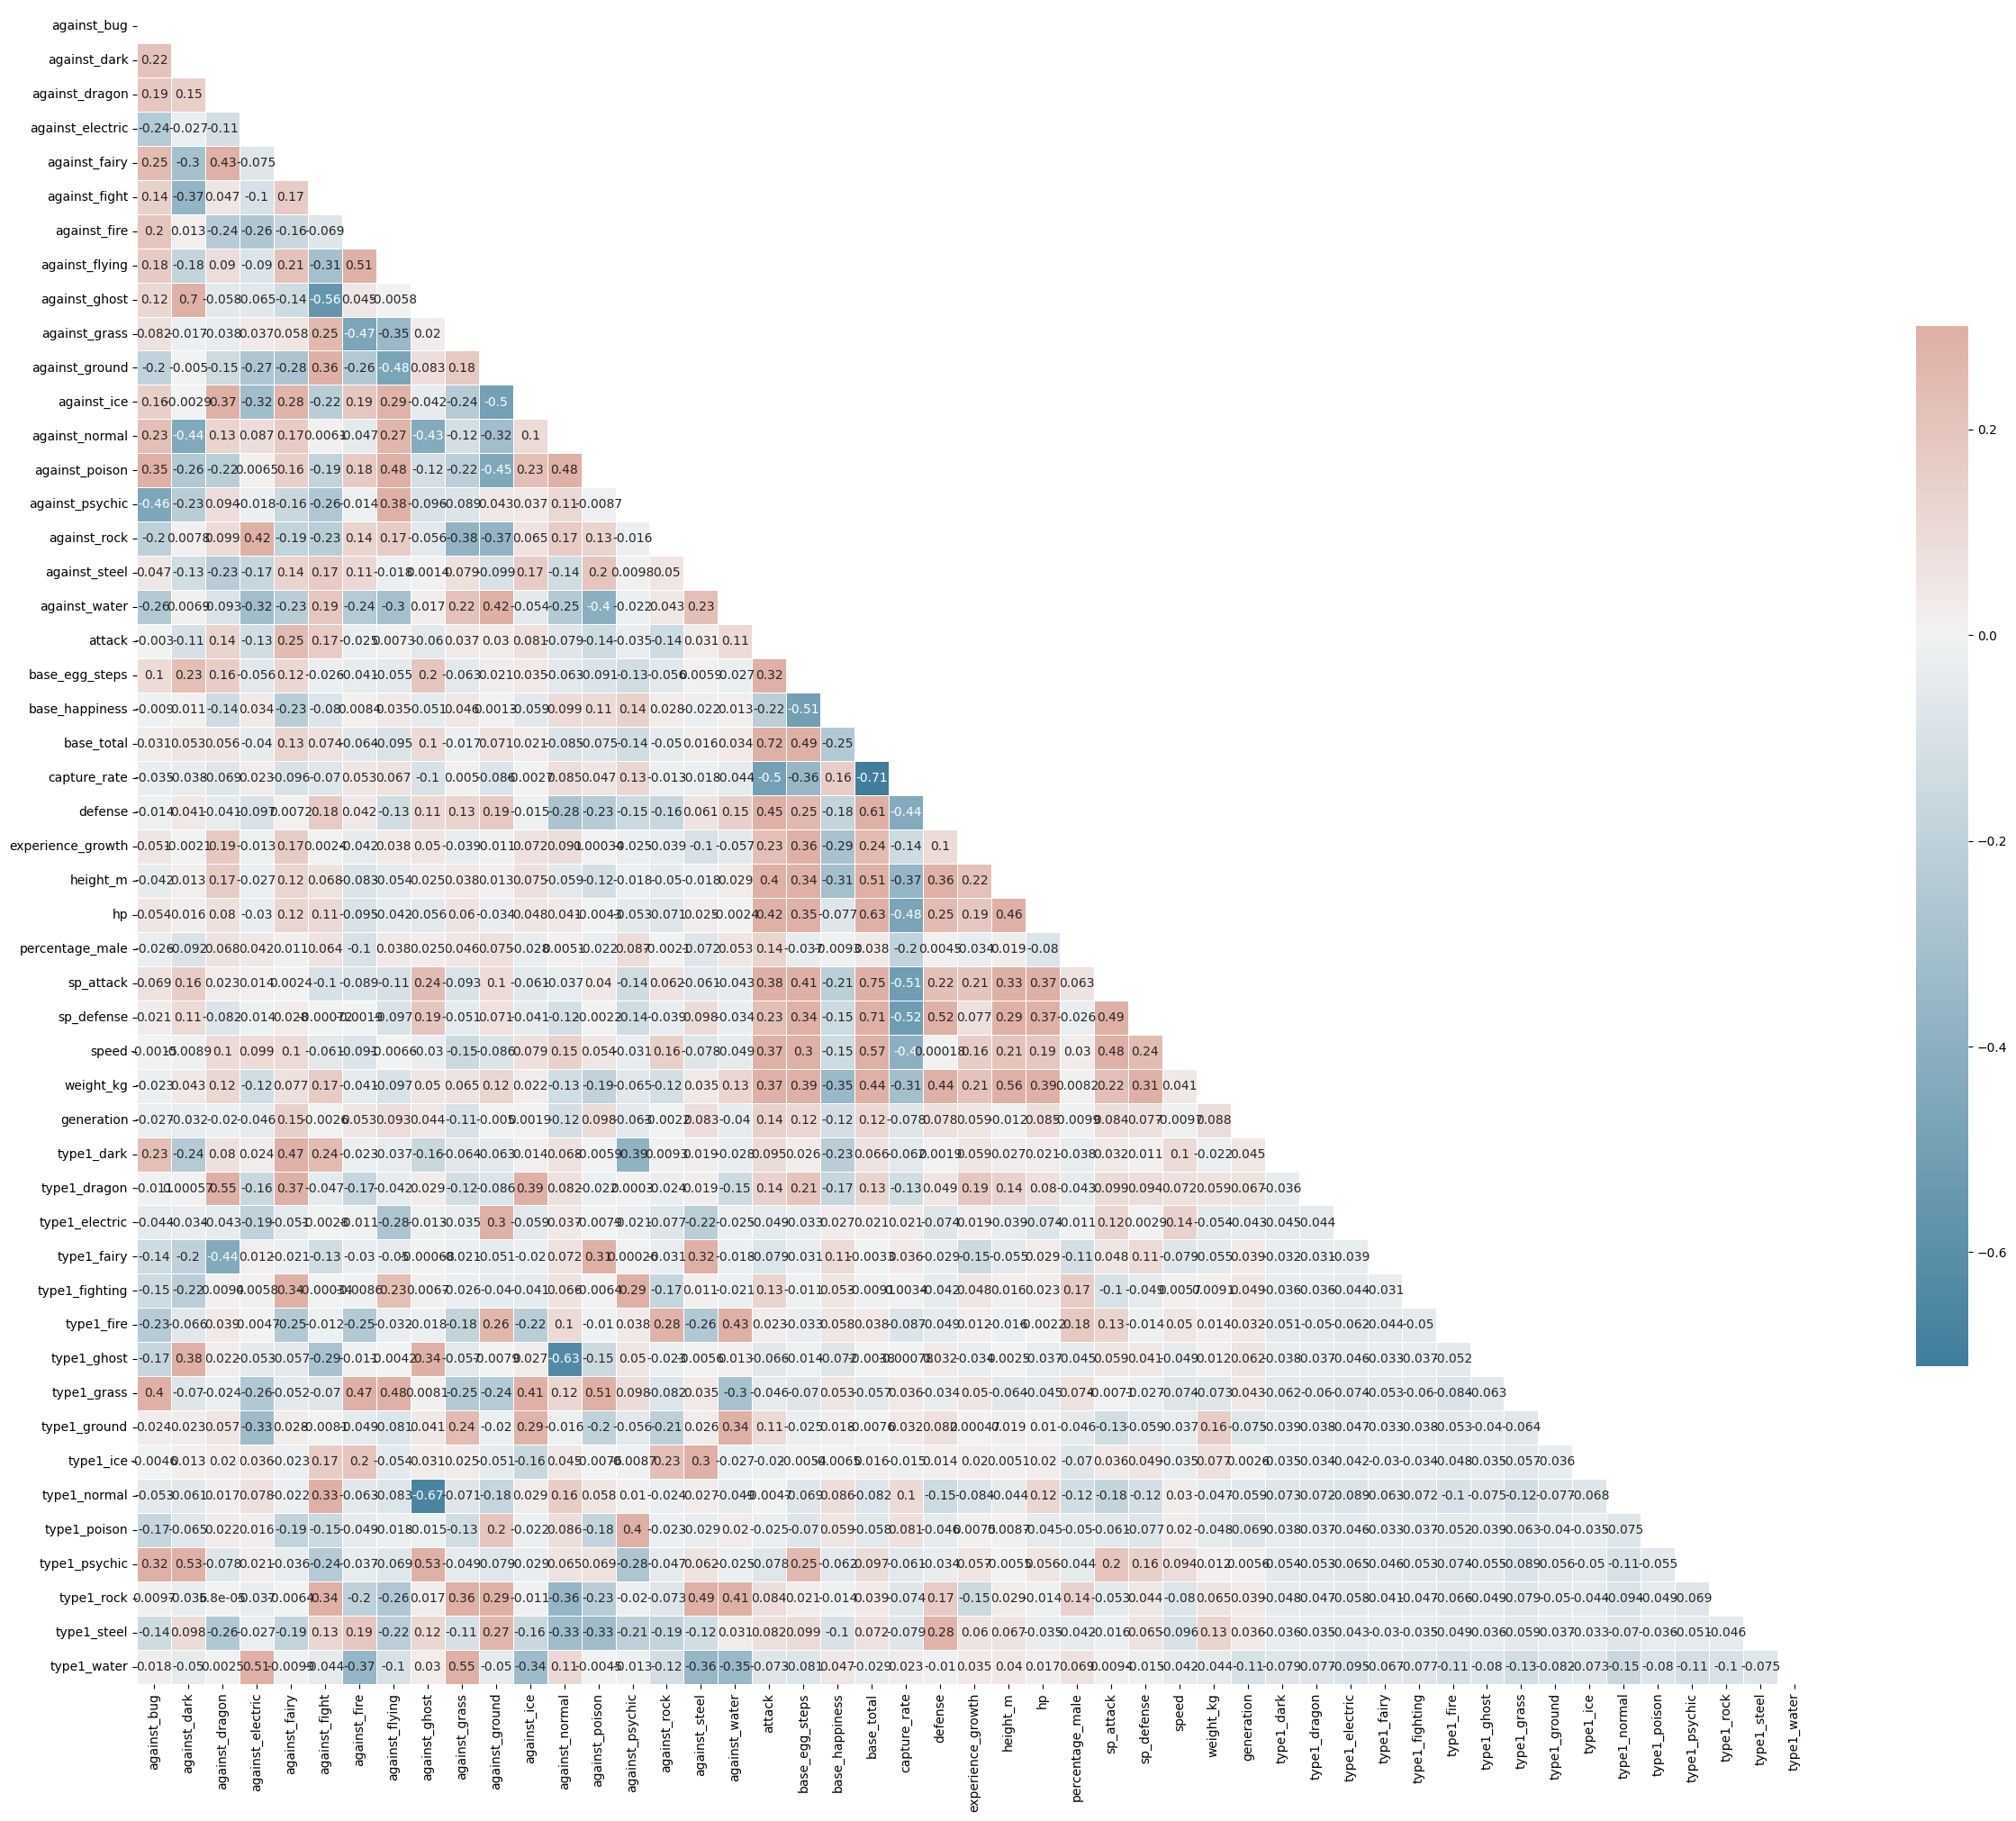

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))

corr = X_train.corr(numeric_only=False)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### Model fitting and Comparison

#### Tuning LR model

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

def print_clf_metrics(y_actual, y_pred):
    print(f'Testing accuracy = {metrics.accuracy_score(y_actual, y_pred)}')
    print(
        f'Testing precision = {metrics.precision_score(y_actual, y_pred)}')
    print(f'Testing recall = {metrics.recall_score(y_actual, y_pred)}')
    print(f'Testing F1-score = {metrics.f1_score(y_actual, y_pred)}')


In [163]:
parameters = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'lbfgs',
                                                                              'liblinear']}


max_iter=1000 in LR constructor

In [164]:
logistic_regression = LogisticRegression(max_iter=1000)
gs_clf = GridSearchCV(logistic_regression, parameters, cv=10)


In [ ]:
gs_clf.fit(X_train, y_train)

best_params = gs_clf.best_params_
best_score = gs_clf.best_score_

In [166]:
print("Tuned Hyperparameters :", best_params)
print("Accuracy :", best_score)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9890625


#### Construct a LR with the best params and Evaluate the LR with the best params

In [167]:
lr_clf = LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [168]:
out = lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

In [169]:
print_clf_metrics(y_test, y_pred)

Testing accuracy = 0.9937888198757764
Testing precision = 0.9333333333333333
Testing recall = 1.0
Testing F1-score = 0.9655172413793104


#### Print the top 5 most influencing features and the top 5 ignored features

In [170]:
names = lr_clf.feature_names_in_
features = []

for i in range(len(names)):
    coef = abs(lr_clf.coef_[0][i])
    features.append([names[i], coef])

influencing = sorted(features, key=lambda x: x[1], reverse=True)
influencing[:5]

[['base_egg_steps', 13.509392329836198],
 ['capture_rate', 10.601438347088386],
 ['type1_normal', 9.625149967664736],
 ['base_total', 7.460536354929674],
 ['experience_growth', 6.9118983166068135]]

In [171]:
ignored = sorted(features, key=lambda x: x[1])
ignored[:5]

[['against_bug', 0.0],
 ['against_dark', 0.0],
 ['against_electric', 0.0],
 ['against_fairy', 0.0],
 ['against_fire', 0.0]]

#### Tuning KNN model

In [172]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': range(1, 15), 'weights': [
    'uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']}

knn = KNeighborsClassifier()
grid_search_clf = GridSearchCV(knn, param_grid=parameters, cv=10)

grid_search_clf.fit(X_train, y_train)

best_params = grid_search_clf.best_params_
best_score = grid_search_clf.best_score_

print("Tuned Hyperparameters :", best_params)
print("Accuracy :", best_score)


Tuned Hyperparameters : {'metric': 'cosine', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy : 0.9515625


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [173]:
knn = KNeighborsClassifier(metric='cosine', n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print_clf_metrics(y_test, y_pred)

Testing accuracy = 0.968944099378882
Testing precision = 1.0
Testing recall = 0.6428571428571429
Testing F1-score = 0.782608695652174


#### Fitting GNB to the data and evaluating on the test dataset

In [99]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)

y_pred = gauss_nb.predict(X_test)

print_clf_metrics(y_test, y_pred)


Testing accuracy = 0.9316770186335404
Testing precision = 0.56
Testing recall = 1.0
Testing F1-score = 0.717948717948718


#### Which metric is most appropriate for this task and why?

The most appropriate metric for this task is F1-score, as it combines information about the accuracy and recall of our algorithm.

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? and based on what
did you pick it?

| | LR | KNN | GNB |
| :-: | :-: | :-: | :-: |
| Accuracy | 0.994 | 0.969 | 0.932 |
| Precision | 0.933 | 1 | 0.56 |
| Recall | 1 | 0.643 | 1 |
| F1-score | 0.966 | 0.783 | 0.718 |

The best model for this task is Logistic Regression, as it has the best metrics among all three models.